# Introduction to NLP Fundamentals in TensorFlow

NLP has the goal of deriving information out of natural language (could be sequences text or speech).

Another common term for NLP problems is sequence to sequence problems (seq2seq).

In [ ]:
# Install tensorflow version 2.15
!pip install tensorflow==2.15

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 53.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 50.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 79.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 32.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 7.0 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.16.0
    Uninstalling wrapt-1.16.0:
      Successfully uninstalled wrapt-1.16.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.0
    Uninstalling ml-dtypes-0.4.0:
      Successfully uninstalled ml-dtypes-0.4.0
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Attempting uninstall: tensorboard
    Found existing installation

In [ ]:
# Check TensorFlow version
import tensorflow as tf
print(tf.__version__)

2.15.0


## Get helper functions

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

# Import series of helper functions for the notebook
from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys

--2024-08-26 16:01:47--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2024-08-26 16:01:48 (116 MB/s) - ‘helper_functions.py’ saved [10246/10246]



## Get a text dataset

The dataset we're going to be using is Kaggle's introduction to NLP dataset (text samples of Tweets labelled as disaster or not disaster).

In [ ]:
!wget "https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip"

# Unzip data
unzip_data("nlp_getting_started.zip")

--2024-08-26 16:16:49--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.207, 142.250.141.207, 74.125.137.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip.1’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.004s  

2024-08-26 16:16:49 (143 MB/s) - ‘nlp_getting_started.zip.1’ saved [607343/607343]



## Visualizing a text dataset

To visualize our text samples, we first need to read them in, one way to do so would be to use Python: https://realpython.com/read-write-files-python/

But we prefer to get visual straight away. So another way to use this is to use **Pandas.**

In [ ]:
import pandas as pd
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
# Shuffle training dataframe
train_df_shuffled = train_df.sample(frac=1, random_state=69)
train_df_shuffled.head()

,id,keyword,location,text,target
421,611,arsonist,[ Blonde Bi Fry. ],'wHeRE's mY aRsOnISt aT???',0
5047,7195,natural%20disaster,home,she's a natural disaster she's the last of the...,0
5046,7194,mudslide,NaN,@nikistitz even the one that looked like a mud...,0
1881,2702,crush,NaN,kenny holland crush da vida,0
6543,9362,survived,NaN,Not one character in the final destination ser...,0


In [ ]:
# What does the test dataframe look like ?
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [ ]:
# How many examples of each classes are there ?
train_df.target.value_counts()

,count
target,
0,4342
1,3271


In [ ]:
# How many total samples are there ?
len(train_df), len(test_df)

(7613, 3263)

In [ ]:
# Let's visualize some random training examples
import random
random_index = random.randint(0, len(train_df)-5) #create random indexes not higher than the total number of samples
for row in train_df_shuffled[["text", "target"]][random_index:random_index+5].itertuples():
  _, text, target = row
  print(f"Target: {target}", "(real disaster)" if target > 0 else "(not real disaster)")
  print(f"Text:\n{text}\n")
  print("---\n")

Target: 1 (real disaster)
Text:
Rly tragedy in MP: Some live to recount horror: ÛÏWhen I saw coaches of my train plunging into water I called ... http://t.co/0Xh758OnUP

---

Target: 0 (not real disaster)
Text:
I didn`t want to hurt you but the fear drove me to do it ............... Midnight

---

Target: 0 (not real disaster)
Text:
Set goals &amp; DEMOLISH them all! ?

---

Target: 0 (not real disaster)
Text:
If you dotish to blight your car go right ahead. Once it's not mine.

---

Target: 1 (real disaster)
Text:
@tinybaby @adultblackmale @mattytalks meltdown mwednesday

---



### Split data into training and validation sets

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Use train_test_split to split training data into training and validation sets
train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df_shuffled["text"].to_numpy(),
                                                                            train_df_shuffled["target"].to_numpy(),
                                                                            test_size=0.1,# use 10% of training data for validation
                                                                            random_state=69)

In [ ]:
# Check the lengths
len(train_sentences), len(train_labels), len(val_sentences), len(val_labels)

(6851, 6851, 762, 762)

In [ ]:
# Check the first 10 samples
train_sentences[:10], train_labels[:10]

(array(['@ChrisDanielShow Nearly-Fatal Pee in San Francisco http://t.co/1tvlFrhm1m',
        "babe I'm gonna ruin you if you let me stay",
        "We're happily collided :)",
        "RT THR 'RT THRArchives: 1928: When Leo the MGM Lion Survived a Plane Crash #TBT http://t.co/Wpkl2qNiQW http://t.co/BD52FxDvhQ'",
        '@FoxNews let me report it to u people instead Mr.Obama just declares CNMI federal disaster area post typhoon soudelor. U guys 2slow2report.',
        "Don't say @ALIPAPER: women got problems this #keepingtheviginaclean thing is very interesting n less expensive #metrofmtalk'",
        "'Jet fuel cant melt steel'\n'The structural failure is illogical'\n'The second plane crashing into the building is fake'\n'It was a bomb'",
        'A grade in Black Horse Famine[MEGA]. Score 0840728\nhttp://t.co/pdiit0AF3Q\n#Dynamix http://t.co/ZQ5KDOx7BY',
        'Even when I was a kid haha super late but folks used to bash me for that shit I understand he survived cancer but he still

## Converting text into numbers

When dealing with text problems , one of the first things you'll need to do before building a nmodel is to convert text into numbers.

There are a few ways to do this, namely:
* Tokenization - direct mapping of token (a token could be a word or a character) to number
* Embedding - create a matrix of feature vector for each token (the size of the feature vector can be defined and this embedding can be learned)

## Text vectorization (tokenization)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization

# Use the default TextVectorization parameters
text_vectorizer = TextVectorization(max_tokens=10000, # how many words in the vocabulary (all of the different words in your text & automatically add <OOV>)
                                    standardize="lower_and_strip_punctuation", # how to process text
                                    split="whitespace", # how to split tokens
                                    ngrams=None, # create groups of n-words?
                                    output_mode="int", # how to map tokens to numbers
                                    output_sequence_length=None,
                                    pad_to_max_tokens=True) # how long should the output sequence of tokens be?

In [ ]:
# Find the average number of tokens (words) in the training tweets
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

15

In [ ]:
# Setup text vectorization variables
max_vocab_length = 10000 # max number of words to have in our vocabulary
max_length = 15 # max length our sequences will be (e.g. how many words will our model see from a Tweet?)

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode="int",
                                    output_sequence_length=max_length)

In [ ]:
# Fit the text vectorizer to our training text
text_vectorizer.adapt(train_sentences)

In [ ]:
# Create a sample sentence and tokenize it
sample_sentence = "There's a flood in my street"
text_vectorizer([sample_sentence])


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[257,   3, 239,   5,  13, 702,   0,   0,   0,   0,   0,   0,   0,
          0,   0]])>

In [ ]:
# Choose a random sentence from our training dataset
random_sentence = random.choice(train_sentences)
print(f"Original text:\n{random_sentence}\
      \n\nVectorized version:")
text_vectorizer([random_sentence])

Original text:
Stupid women nearly collided into me today after she came out of a junction not looking. Still kept coming towards me till I beep my horn      

Vectorized version:


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[1609,  457,  839,  303,   66,   26,  136,   41,  196,  421,   36,
           6,    3,    1,   33]])>

In [ ]:
# Get the unique words in the vocabulary
words_in_vocab = text_vectorizer.get_vocabulary() # get all of the unique words in our training data
top_5_words = words_in_vocab[:5] # get the most common words
bottom_5_words = words_in_vocab[-5:] # get the least common words
print(f"Number of words in vocab: {len(words_in_vocab)}")
print(f"Top 5 most common words: {top_5_words}")
print(f"Bottom 5 least common words: {bottom_5_words}")

Number of words in vocab: 10000
Top 5 most common words: ['', '[UNK]', 'the', 'a', 'to']
Bottom 5 least common words: ['panicked', 'pandora', 'pandemoniumiso', 'pandemic', 'panda']


### Creating an Embedding using an Embedding layer

To make our embedding, we're gonna use TensorFlow's embedding layer: https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding

The parameters we care most about for our embedding layer:
* `input_dim` = the size of our vocabulary
* `output_dim` = the size of the output embedding vector, for example, a value of 100 would mean each token gets represented by a vector 100 long
* `input_length` = length of the sequences being passed to the embedding layer

In [ ]:
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim=max_vocab_length, #set input shape
                             output_dim=128, #output shape
                             embeddings_initializer="uniform",
                             input_length=max_length #how long is each input
                             )
embedding

In [ ]:
# Get a random sentence from the training set
random_sentence = random.choice(train_sentences)
print(f"Original text:\n{random_sentence}\
      \n\nEmbedded version:")

# Embed the random sentence (turn it into dense vectors of fixed size)
sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

Original text:
Everything has sunk in except the fact that I am actually moving to the state of Colorado tomorrow. Been dreaming of it since I was a kid.??      

Embedded version:


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[ 0.00636565,  0.00592681,  0.00358897, ..., -0.01084081,
         -0.02213096, -0.00346457],
        [-0.04003441, -0.03282468,  0.04214465, ..., -0.0074444 ,
          0.04960043, -0.02172639],
        [ 0.04068836,  0.02085599, -0.04270485, ..., -0.02796459,
          0.02744306,  0.03984911],
        ...,
        [-0.02230558,  0.04222805, -0.03502367, ...,  0.02244448,
          0.04641071,  0.01419706],
        [ 0.0094371 ,  0.02161688,  0.02060472, ...,  0.04133889,
          0.01444495,  0.01420912],
        [-0.00747392,  0.0199254 , -0.01110135, ...,  0.03875181,
         -0.04933609,  0.0426794 ]]], dtype=float32)>

In [ ]:
# Check out a single token embedding
sample_embed[0][0], sample_embed[0][0].shape, random_sentence

(<tf.Tensor: shape=(128,), dtype=float32, numpy=
 array([ 0.00636565,  0.00592681,  0.00358897,  0.00534964,  0.00436587,
        -0.01361718,  0.02591332, -0.03729271, -0.00698181,  0.00970882,
        -0.01243133, -0.01642624,  0.03250423, -0.02135881, -0.00098584,
         0.0456293 ,  0.04400161, -0.01775271,  0.03560206,  0.03987877,
        -0.04508553, -0.01209326, -0.04704343,  0.04747901, -0.01533603,
         0.00015562, -0.0015602 ,  0.02665054,  0.04085553,  0.0445067 ,
         0.04689126, -0.03652652,  0.03012563, -0.04621495, -0.02144338,
         0.02042068,  0.00521366,  0.03142276,  0.00728102, -0.00927367,
        -0.01318737,  0.02145623,  0.04055803, -0.00419555,  0.04442736,
         0.01002332, -0.03560114,  0.04917708,  0.03242168, -0.04976051,
         0.04561937, -0.01038402,  0.04137191,  0.02373941, -0.01848875,
         0.019524  , -0.01055177,  0.00153286, -0.04953199,  0.02372998,
         0.04326013,  0.04313648, -0.00027329,  0.01762129,  0.03331436,
  

## Modelling a text dataset (runninga aseries of experiments)

Now we've got a way to turn our text data into numbers, it's time to start building a series of modelling experiments.

We'll start with a baseline and move on from there.

* Model 0: Naive Bayes (baseline), this is from Sklearn ML map: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html
* Model 1: Feed-forward neural network (dense model)
* Model 2: LSTM model (RNN)
* Model 3: GRU model (RNN)
* Model 4: Bidirectional-LSTM model (RNN)
* Model 5: 1D Convolutional Neural Network (CNN)
* Model 6: TensorFlow Hub Pretrained Feature Extractor (using transfer learning from NLP)
* Model 7: Same as model 6 with 10% of training data

How are we going to approach all these ?

Use the standard steps in modelling with tensorflow:
* Create a model
* Build a model
* Fit a model
* Evaluate our model

### Model 0: Getting a baseline

As with all machine learning modelling experiments, it's important to create a baseline model so you've got a benchmark for future experiments to build upon.

For the baseline, we'll use Sklearn's Multinomial Naive Bayes using the TF-IDF formula to convert our words to numbers.

> 🔑**Note:** It's common practice to use non-DL algorithms as a baseline because of their speed and then later using DL to see if you can improve upon them.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Create Tokenization and modelling pipeline
model_0 = Pipeline([
    ("tfidf", TfidfVectorizer()), # convert words to numbers using tfidf
    ("clf", MultinomialNB()) # model the text
])

# Fit the pipeline to the training data
model_0.fit(train_sentences, train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [ ]:
# Evaluate our baseline model
baseline_score = model_0.score(val_sentences,val_labels)
print(f"Our baseline model achieves an accuracy of: {baseline_score*100:.2f}%")

Our baseline model achieves an accuracy of: 79.79%


In [ ]:
# Make predictions
baseline_preds = model_0.predict(val_sentences)
baseline_preds[:20]

array([1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

### Creating an evaluation function for our modelling experiments

We could evaluate all of our model's predictions with different metrics everytime, however this will be cumbersome and could easily be fixed with a function.

Let's create one to compare our model's predictions with the truth labels using the following metrics:
* Accuracy
* Precision
* Recall
* F1-score

In [ ]:
# Function to evaluate: accuracy, precision, recall, f1-score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true,y_pred):
  """
  Calculates model accuracy, precision, recall and f1 score of a binary classification model.
  """
  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true,y_pred) * 100
  # Calculate model precision, recall and f1-score using "weighted" average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true,y_pred,average="weighted")
  model_results = {"accuracy": model_accuracy,
                   "precision": model_precision,
                   "recall": model_recall,
                   "f1": model_f1}
  return model_results

In [ ]:
# Get baseline results
baseline_results = calculate_results(y_true=val_labels,
                                     y_pred=baseline_preds)
baseline_results

{'accuracy': 79.79002624671917,
 'precision': 0.8049118114708822,
 'recall': 0.7979002624671916,
 'f1': 0.7932923017133588}

### Model 1: A simple dense model

In [ ]:
# Create a tensorboard callback (need to create a new one for each model)
from helper_functions import create_tensorboard_callback

# Create a directory to save tensorboard logs
SAVE_DIR = "model_logs"

In [ ]:
# Build model with the Functional API
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype=tf.string) # inputs are 1-dimensional strings
x = text_vectorizer(inputs) # turn the input text into numbers
x = embedding(x) # create an embedding of the numerized inputs
x = layers.GlobalAveragePooling1D()(x) # condense the feature vector for each token to one vector
outputs = layers.Dense(1, activation="sigmoid")(x) # create the output layer, want binary outputs so use sigmoid activation function
model_1 = tf.keras.Model(inputs,outputs,name="model_1_dense")

In [ ]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (  (None, 128)               0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1280129 (4.88 MB)
Trainable params: 128

In [ ]:
# Compile the model
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
# Fit the model
model_1_history = model_1.fit(x=train_sentences,
                              y=train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                     experiment_name="model_1_dense")])

Saving TensorBoard log files to: model_logs/model_1_dense/20240826-160154
Epoch 1/5
215/215 [==============================] - 22s 90ms/step - loss: 0.6092 - accuracy: 0.7057 - val_loss: 0.5307 - val_accuracy: 0.7572
Epoch 2/5
215/215 [==============================] - 5s 22ms/step - loss: 0.4414 - accuracy: 0.8170 - val_loss: 0.4706 - val_accuracy: 0.7874
Epoch 3/5
215/215 [==============================] - 3s 12ms/step - loss: 0.3461 - accuracy: 0.8602 - val_loss: 0.4614 - val_accuracy: 0.7887
Epoch 4/5
215/215 [==============================] - 1s 5ms/step - loss: 0.2832 - accuracy: 0.8926 - val_loss: 0.4705 - val_accuracy: 0.7861
Epoch 5/5
215/215 [==============================] - 1s 5ms/step - loss: 0.2349 - accuracy: 0.9118 - val_loss: 0.4927 - val_accuracy: 0.7835


In [ ]:
# Check the results
model_1.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 3ms/step - loss: 0.4927 - accuracy: 0.7835


[0.49266135692596436, 0.7834645509719849]

In [ ]:
# Make some predictions and evaluate those
model_1_pred_probs = model_1.predict(val_sentences)
model_1_pred_probs[0]

24/24 [==============================] - 0s 2ms/step


array([0.9332523], dtype=float32)

In [ ]:
# Looking at the first 10 predictions
model_1_pred_probs[:10]

array([[0.9332523 ],
       [0.5176898 ],
       [0.02935266],
       [0.01690857],
       [0.15615188],
       [0.95781404],
       [0.9635358 ],
       [0.03265593],
       [0.09347857],
       [0.99869955]], dtype=float32)

In [ ]:
# Convert model predictions probabilities to label format
model_1_preds = tf.squeeze(tf.round(model_1_pred_probs))
model_1_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 0., 0., 0., 1., 1., 0., 0., 1.], dtype=float32)>

In [ ]:
# Calculate our model_1 results
model_1_results = calculate_results(y_true=val_labels,
                                    y_pred=model_1_preds)
model_1_results

{'accuracy': 78.34645669291339,
 'precision': 0.7834899124733871,
 'recall': 0.7834645669291339,
 'f1': 0.7815717498014031}

In [ ]:
# Checking our baseline results
baseline_results

{'accuracy': 79.79002624671917,
 'precision': 0.8049118114708822,
 'recall': 0.7979002624671916,
 'f1': 0.7932923017133588}

In [ ]:
# Checking whether our deep learning model has better results than our baseline model or not
import numpy as np
np.array(list(model_1_results.values())) > np.array(list(baseline_results.values()))

array([False, False, False, False])

## Visualizing learned embeddings

In [ ]:
# Get the vocabulary from the text vectorization layer
words_in_vocab = text_vectorizer.get_vocabulary()
len(words_in_vocab), words_in_vocab[:10]

(10000, ['', '[UNK]', 'the', 'a', 'to', 'in', 'of', 'and', 'i', 'is'])

In [ ]:
# Model 1 summary
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (  (None, 128)               0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1280129 (4.88 MB)
Trainable params: 128

In [ ]:
# Get the weight matrix of the embedding layer
# (these are the numerical representations of each token in our training data, which have been learned for 5 epochs)
embed_weights = model_1.get_layer("embedding").get_weights()[0]
embed_weights, embed_weights.shape # same size as vocab size and embedding_dim (output_dim of our embedding layer)

(array([[-0.02944021, -0.02974595, -0.02869743, ...,  0.0485525 ,
          0.01343261,  0.05261881],
        [ 0.02543957, -0.00868237,  0.02968126, ...,  0.02044986,
         -0.0354412 ,  0.01557357],
        [ 0.02001975,  0.00896708,  0.00704742, ...,  0.05423174,
          0.02786206,  0.02721484],
        ...,
        [ 0.09846632, -0.02381583, -0.01757441, ...,  0.02265988,
          0.04527343,  0.09142945],
        [ 0.01184744,  0.00159121, -0.04718976, ...,  0.01403471,
          0.04407259,  0.03768918],
        [-0.05426613,  0.03569142,  0.05401192, ..., -0.03051467,
         -0.0842123 , -0.07765542]], dtype=float32),
 (10000, 128))

Now we've got the embedding matrix our model has learned to represent our tokens, let's see how we can visualize it.

To do so, TensorFlow has a handy tool called projector: https://projector.tensorflow.org/

And TensorFlow also has an excellent guide on word embeddings themselves: https://www.tensorflow.org/tutorials/text/word_embeddings

In [ ]:
# Create embedding files (we got this from TensorFlow's word embeddings documentation)
import io
out_v = io.open("vectors.tsv", "w", encoding="utf-8")
out_m = io.open("metadata.tsv", "w", encoding="utf-8")

for index, word in enumerate(words_in_vocab):
  if index == 0:
    continue # skip 0, it's padding
  vec = embed_weights[index]
  out_v.write("\t".join([str(x) for x in vec]) + "\n")
  out_m.write(word + "\n")
out_v.close()
out_m.close()

In [ ]:
# Download files from Colab to upload to projector
try:
  from google.colab import files
  files.download("vectors.tsv")
  files.download("metadata.tsv")
except Exception:
  pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Recurrent Neural Networks (RNN's)

RNN's are useful for sequence data.

The premise of a recurrent neural network is to use the representation of a previous input to aid the representation of a later input.

**📖Resources:**
If you want an overview of the internals of a recurrent neural network , see the following:
- MIT's sequence modelling lecture: https://youtu.be/qjrad0V0uJE
- Chris Olah's intro to LSTMs: https://colah.github.io/posts/2015-08-Understanding-LSTMs/
- Andrej Karpathy's the unreasonable effectiveness of RNNs: http://karpathy.github.io/2015/05/21/rnn-effectiveness/


### Model 2: LSTM

LSTM = Long Short Term Memory (one of the most popular LSTM cells)

Our structure of an RNN typically looks like this :
```
Input(text) -> Tokenize -> Embedding -> Layers (RNNs/Dense) -> Output (label probability)
```

In [ ]:
# Create an LSTM model
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
#print(x.shape)
#x = layers.LSTM(units=64, return_sequences=True)(x) # when you're stacking rnn cells together , you need to set return sequences=True
#print(x.shape)
x = layers.LSTM(64)(x)
#print(x.shape)
#x = layers.Dense(64, activation="relu")(x)
#print(x.shape)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_2 = tf.keras.Model(inputs,outputs,name = "model_2_LSTM")

In [ ]:
# Get a summary of our model 2
model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1329473 (5.07 MB)
Trainable params: 1329473 (5.07 MB)
Non-trainable params: 0 (0.00 Byte)
________________

In [ ]:
# Compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
# Fit the model
model_2_history = model_2.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "model_2_LSTM")])

Saving TensorBoard log files to: model_logs/model_2_LSTM/20240826-160239
Epoch 1/5
215/215 [==============================] - 11s 37ms/step - loss: 0.2157 - accuracy: 0.9237 - val_loss: 0.6109 - val_accuracy: 0.7612
Epoch 2/5
215/215 [==============================] - 2s 9ms/step - loss: 0.1521 - accuracy: 0.9432 - val_loss: 0.7292 - val_accuracy: 0.7572
Epoch 3/5
215/215 [==============================] - 3s 12ms/step - loss: 0.1266 - accuracy: 0.9542 - val_loss: 0.7395 - val_accuracy: 0.7388
Epoch 4/5
215/215 [==============================] - 2s 10ms/step - loss: 0.1013 - accuracy: 0.9637 - val_loss: 0.8612 - val_accuracy: 0.7415
Epoch 5/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0847 - accuracy: 0.9672 - val_loss: 1.0160 - val_accuracy: 0.7362


In [ ]:
# Make predictions with LSTM's model
model_2_pred_probs = model_2.predict(val_sentences)
model_2_pred_probs

24/24 [==============================] - 0s 3ms/step


array([[9.74485755e-01],
       [3.41281682e-01],
       [2.07626028e-03],
       [7.56050867e-04],
       [2.46443450e-01],
       [9.99582469e-01],
       [9.99444425e-01],
       [7.24329962e-04],
       [5.83686400e-04],
       [9.99621868e-01],
       [4.79295030e-02],
       [3.87503207e-03],
       [9.99112308e-01],
       [2.88668163e-02],
       [1.46989241e-01],
       [2.43674517e-02],
       [1.06075974e-02],
       [1.99650065e-03],
       [8.72637182e-02],
       [4.06031966e-01],
       [1.15894988e-01],
       [9.99246716e-01],
       [1.82601377e-01],
       [9.60512280e-01],
       [9.99822319e-01],
       [2.46453762e-01],
       [2.60467903e-04],
       [9.99500990e-01],
       [2.18813494e-03],
       [9.98732388e-01],
       [8.40608205e-04],
       [9.99039292e-01],
       [2.86458852e-03],
       [8.85849059e-01],
       [9.89998996e-01],
       [4.46938537e-03],
       [6.11255109e-01],
       [8.26885551e-02],
       [1.67559814e-02],
       [1.08398348e-02],


In [ ]:
# Convert model 2 pred probs to labels
model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))
model_2_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 0., 0., 0., 0., 1., 1., 0., 0., 1.], dtype=float32)>

In [ ]:
# Calculate model_2 results
model_2_results = calculate_results(y_true=val_labels,
                                    y_pred=model_2_preds)
model_2_results

{'accuracy': 73.62204724409449,
 'precision': 0.7356783499799904,
 'recall': 0.7362204724409449,
 'f1': 0.7358868349636495}

We can still see that our RNN layer using LSTM doesn't beat our baseline model

### Model 3 : GRU

Another popular and effective RNN component is the GRU or gated recurrent unit.

The GRU cell has similar features to an LSTM cell but has less parameters.

In [ ]:
# Build an RNN using the GRU cell
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GRU(64)(x)
#x = layers.LSTM(64)(x)
#x = layers.GRU(64)(x)
#x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_3 = tf.keras.Model(inputs,outputs, name="model_3_GRU")

In [ ]:
model_3.summary()

Model: "model_3_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 gru (GRU)                   (None, 64)                37248     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1317313 (5.03 MB)
Trainable params: 1317313 (5.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________

In [ ]:
# Compile the model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
# Fit the model
model_3_history = model_3.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "model_3_GRU")])

Saving TensorBoard log files to: model_logs/model_3_GRU/20240826-160300
Epoch 1/5
215/215 [==============================] - 11s 40ms/step - loss: 0.1556 - accuracy: 0.9410 - val_loss: 0.8924 - val_accuracy: 0.7388
Epoch 2/5
215/215 [==============================] - 2s 10ms/step - loss: 0.0816 - accuracy: 0.9715 - val_loss: 0.8376 - val_accuracy: 0.7520
Epoch 3/5
215/215 [==============================] - 2s 10ms/step - loss: 0.0717 - accuracy: 0.9736 - val_loss: 1.1107 - val_accuracy: 0.7323
Epoch 4/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0590 - accuracy: 0.9771 - val_loss: 1.1586 - val_accuracy: 0.7270
Epoch 5/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0529 - accuracy: 0.9766 - val_loss: 1.3298 - val_accuracy: 0.7310


In [ ]:
# Make some predictions with our GRU model
model_3_pred_probs = model_3.predict(val_sentences)
model_3_pred_probs[:10]

24/24 [==============================] - 0s 3ms/step


array([[9.9677700e-01],
       [2.2558276e-01],
       [7.3814642e-04],
       [2.3152212e-04],
       [1.7952776e-01],
       [9.9988663e-01],
       [9.9979180e-01],
       [2.7436859e-04],
       [1.7627304e-04],
       [9.9985206e-01]], dtype=float32)

In [ ]:
# Convert model 3 pred probs to labels
model_3_preds = tf.squeeze(tf.round(model_3_pred_probs))
model_3_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 0., 0., 0., 0., 1., 1., 0., 0., 1.], dtype=float32)>

In [ ]:
# Calculate model 3 results
model_3_results = calculate_results(y_true=val_labels,
                                    y_pred=model_3_preds)
model_3_results

{'accuracy': 73.0971128608924,
 'precision': 0.7308822912966644,
 'recall': 0.7309711286089239,
 'f1': 0.7309254454828463}

### Model 4: Bidirectional RNN

Normal RNN's go from left to right (just like you'd read an English sentence) however, a bidirectional RNN goes from right to left as well as left to right.

In [ ]:
# Build a bidirectional RNN in tensorflow
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
#x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x)
x = layers.Bidirectional(layers.LSTM(64))(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_4 = tf.keras.Model(inputs, outputs, name="model_4_bidirectional")

In [ ]:
# Get a summary
model_4.summary()

Model: "model_4_bidirectional"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 bidirectional (Bidirection  (None, 128)               98816     
 al)                                                             
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1378945 (5.26 MB)
Trainable par

In [ ]:
# Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

In [ ]:
# Fit the model
model_4_history = model_4.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences,val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "model_4_bidirectional")])

Saving TensorBoard log files to: model_logs/model_4_bidirectional/20240826-160324
Epoch 1/5
215/215 [==============================] - 13s 45ms/step - loss: 0.1058 - accuracy: 0.9731 - val_loss: 1.1247 - val_accuracy: 0.7310
Epoch 2/5
215/215 [==============================] - 3s 14ms/step - loss: 0.0536 - accuracy: 0.9775 - val_loss: 1.2930 - val_accuracy: 0.7310
Epoch 3/5
215/215 [==============================] - 2s 10ms/step - loss: 0.0434 - accuracy: 0.9806 - val_loss: 1.3458 - val_accuracy: 0.7323
Epoch 4/5
215/215 [==============================] - 2s 10ms/step - loss: 0.0453 - accuracy: 0.9796 - val_loss: 1.3129 - val_accuracy: 0.7205
Epoch 5/5
215/215 [==============================] - 3s 14ms/step - loss: 0.0401 - accuracy: 0.9822 - val_loss: 1.4681 - val_accuracy: 0.7310


In [ ]:
# Make predictions with our bidirectional model
model_4_pred_probs = model_4.predict(val_sentences)
model_4_pred_probs[:10]

24/24 [==============================] - 1s 3ms/step


array([[9.96121347e-01],
       [2.75516063e-01],
       [1.04445426e-04],
       [5.98391744e-05],
       [4.07717019e-01],
       [9.99933004e-01],
       [9.99935746e-01],
       [8.77438069e-05],
       [2.85973001e-05],
       [9.99959707e-01]], dtype=float32)

In [ ]:
# Convert pred probs to pred labels
model_4_preds = tf.squeeze(tf.round(model_4_pred_probs))
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 0., 0., 0., 0., 1., 1., 0., 0., 1.], dtype=float32)>

In [ ]:
# Calculate the results of our bidirectional model
model_4_results = calculate_results(y_true=val_labels,
                                    y_pred=model_4_preds)
model_4_results

{'accuracy': 73.0971128608924,
 'precision': 0.7335539313817079,
 'recall': 0.7309711286089239,
 'f1': 0.7317080094292809}

## Convolutional Neural Networks for Text (and other types of sequences)

We've used CNNs for images but images are typically 2D (height x width)...however, our data is 1D.

Previously we've used Conv2D for our image data , but now we're going to use Conv1D.

The typical structure of a Conv1D model for sequences (in our case, text) looks like this:

```
Input (text) -> Tokenization -> Embedding -> Layer(s) (typically Conv1D + pooling) -> Outputs (class probabilities)
```

### Model 5: Conv1D

In [ ]:
# Test out our embedding layer, Conv1D layer asndf max pooling
from tensorflow.keras import layers
embedding_test = embedding(text_vectorizer(["this is a test sentence"]))
conv_1d = layers.Conv1D(filters=32,
                        kernel_size=5, # this is also referred to as an ngram of 5 (meaning it looks at 5 words at a time)
                        strides=1, # default
                        activation="relu",
                        padding="same") # default = "valid", the output is smaller than the input shape, "same" means output is same as input
conv_1d_output = conv_1d(embedding_test) # pass test embedding through conv1D layer
max_pool = layers.GlobalMaxPool1D()
max_pool_output = max_pool(conv_1d_output) # equivalent to "get the most important feature"
embedding_test.shape, conv_1d_output.shape, max_pool_output.shape

(TensorShape([1, 15, 128]), TensorShape([1, 15, 32]), TensorShape([1, 32]))

In [ ]:
embedding_test

<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[ 0.04618527, -0.0701745 , -0.07419334, ...,  0.02595809,
          0.0332571 ,  0.02125148],
        [ 0.03886741, -0.02187036,  0.01731213, ..., -0.00366324,
          0.01545165,  0.0117384 ],
        [ 0.0357705 , -0.04654601, -0.03233727, ...,  0.03305587,
          0.02473041,  0.05499237],
        ...,
        [-0.01742523, -0.00262937, -0.00753612, ...,  0.02129435,
          0.02411881,  0.02747238],
        [-0.01742523, -0.00262937, -0.00753612, ...,  0.02129435,
          0.02411881,  0.02747238],
        [-0.01742523, -0.00262937, -0.00753612, ...,  0.02129435,
          0.02411881,  0.02747238]]], dtype=float32)>

In [ ]:
conv_1d_output

<tf.Tensor: shape=(1, 15, 32), dtype=float32, numpy=
array([[[0.        , 0.07005733, 0.01847008, 0.        , 0.        ,
         0.        , 0.        , 0.01301908, 0.        , 0.03740363,
         0.        , 0.02681712, 0.04972615, 0.01540109, 0.03885901,
         0.        , 0.018817  , 0.00199707, 0.00718727, 0.02438145,
         0.02730734, 0.06497042, 0.03106698, 0.        , 0.02048746,
         0.        , 0.        , 0.02492594, 0.        , 0.        ,
         0.        , 0.01573884],
        [0.        , 0.        , 0.00564125, 0.        , 0.03863302,
         0.        , 0.0087622 , 0.00336095, 0.        , 0.01231745,
         0.0043183 , 0.        , 0.08756079, 0.        , 0.03681967,
         0.00181954, 0.05325651, 0.        , 0.        , 0.01064526,
         0.00838085, 0.00469184, 0.        , 0.04460097, 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.07669897,
         0.        , 0.05586149],
        [0.        , 0.00196721, 0.04055609, 0.0848

In [ ]:
max_pool_output

<tf.Tensor: shape=(1, 32), dtype=float32, numpy=
array([[0.        , 0.07007068, 0.09290911, 0.08487642, 0.06120649,
        0.06496571, 0.04332832, 0.0331891 , 0.04685993, 0.03947884,
        0.02869822, 0.04100617, 0.08756079, 0.06499131, 0.03885901,
        0.03871432, 0.05325651, 0.05332889, 0.05056716, 0.06528497,
        0.04606551, 0.08381011, 0.03106698, 0.10842311, 0.03231592,
        0.03117438, 0.01310195, 0.02492594, 0.02273368, 0.07669897,
        0.02901004, 0.06633796]], dtype=float32)>

In [ ]:
# Create 1-dimensional convolutional layer to model sequences
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Conv1D(filters=64, kernel_size=5, strides=1, activation="relu", padding="valid")(x)
x = layers.GlobalMaxPool1D()(x)
#x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_5 = tf.keras.Model(inputs, outputs, name="model_5_Conv1D")

# Compile Conv1D
model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Get a summary of our Conv1D model
model_5.summary()

Model: "model_5_Conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 conv1d_1 (Conv1D)           (None, 11, 64)            41024     
                                                                 
 global_max_pooling1d_1 (Gl  (None, 64)                0         
 obalMaxPooling1D)                                               
                                                                 
 dense_4 (Dense)             (None, 1)              

In [ ]:
# Fit the model
model_5_history = model_5.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences,val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "Conv1D")])

Saving TensorBoard log files to: model_logs/Conv1D/20240826-160349
Epoch 1/5
215/215 [==============================] - 9s 34ms/step - loss: 0.1181 - accuracy: 0.9623 - val_loss: 1.0185 - val_accuracy: 0.7310
Epoch 2/5
215/215 [==============================] - 3s 14ms/step - loss: 0.0732 - accuracy: 0.9714 - val_loss: 1.1899 - val_accuracy: 0.7349
Epoch 3/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0595 - accuracy: 0.9769 - val_loss: 1.2885 - val_accuracy: 0.7283
Epoch 4/5
215/215 [==============================] - 1s 7ms/step - loss: 0.0544 - accuracy: 0.9772 - val_loss: 1.3460 - val_accuracy: 0.7283
Epoch 5/5
215/215 [==============================] - 2s 7ms/step - loss: 0.0515 - accuracy: 0.9791 - val_loss: 1.4019 - val_accuracy: 0.7192


In [ ]:
# Make some predictions with our Conv1D model
model_5_pred_probs = model_5.predict(val_sentences)
model_5_pred_probs[:10]

24/24 [==============================] - 0s 4ms/step


array([[9.9915147e-01],
       [9.9988949e-01],
       [2.4530600e-06],
       [1.3084286e-06],
       [1.7545819e-01],
       [9.9999988e-01],
       [1.0000000e+00],
       [1.3574862e-05],
       [3.0979718e-05],
       [9.9999988e-01]], dtype=float32)

In [ ]:
# Convert model 5 pred probs to labels
model_5_preds = tf.squeeze(tf.round(model_5_pred_probs))
model_5_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 0., 0., 0., 1., 1., 0., 0., 1.], dtype=float32)>

In [ ]:
# Evaluate model 5 predictions
model_5_results = calculate_results(y_true=val_labels,
                                    y_pred=model_5_preds)
model_5_results

{'accuracy': 71.91601049868767,
 'precision': 0.7222708272577039,
 'recall': 0.7191601049868767,
 'f1': 0.7200034152753113}

In [ ]:
baseline_results

{'accuracy': 79.79002624671917,
 'precision': 0.8049118114708822,
 'recall': 0.7979002624671916,
 'f1': 0.7932923017133588}

## Model 6: TensorFlow Hub Pretrained Sentence Encoder

Now we've built a few of our own models, let's try and use transfer learning for NLP, specifically using TensorFlow Hub's Universal Sentence Encoder.

In [ ]:
sample_sentence

"There's a flood in my street"

In [ ]:
import tensorflow_hub as hub
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
embed_samples = embed([sample_sentence, "When you can the universal sentence encoder on a sentence, it turns it into numbers."])
print(embed_samples[0][:50])

tf.Tensor(
[-0.01157028  0.0248591   0.02878048 -0.012715    0.03971538  0.0882776
  0.02680984  0.05589836 -0.0106873  -0.00597291  0.00639323 -0.01819518
  0.00030813  0.09105888  0.05874644 -0.03180628  0.01512474 -0.05162929
  0.00991367 -0.06865347 -0.04209306  0.02678981  0.03011006  0.00321069
 -0.00337973 -0.04787357  0.0226672  -0.00985925 -0.04063613 -0.01292092
 -0.04666384  0.05630299 -0.03949255  0.00517686  0.02495829 -0.0701444
  0.02871508  0.04947684 -0.00633979 -0.08960192  0.02807118 -0.00808364
 -0.01360602  0.0599865  -0.10361787 -0.05195374  0.00232954 -0.02332531
 -0.03758105  0.03327728], shape=(50,), dtype=float32)


### The **USE** (Universal Sentence Encoder) takes an english sentence of variable length as input and turns it into a feature vector of size 512 as output , based on the patterns it had previously trained on.

In [ ]:
# Create a Keras layer using the USE pretrained layer from TensorFlow Hub
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[], # shape of inputs coming to our model,
                                        dtype=tf.string, # data type of inputs
                                        trainable=False, # keep the pretrained weights (we'll create a feature extractor)
                                        name="USE")

In [ ]:
# Create a model using the Sequential API
model_6 = tf.keras.Sequential([
  sentence_encoder_layer, # take in sentences and then encode them into an embedding
  layers.Dense(64, activation="relu"),
  layers.Dense(1, activation="sigmoid")],
  name="model_6_USE")

# Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_6.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_5 (Dense)             (None, 64)                32832     
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256830721 (979.73 MB)
Trainable params: 32897 (128.50 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [ ]:
# Train a classifier on top of USE pretrained embeddings
model_6_history = model_6.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "tf_hub_sentence_encoder")])

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder/20240826-160444
Epoch 1/5
215/215 [==============================] - 7s 19ms/step - loss: 0.4985 - accuracy: 0.7879 - val_loss: 0.4506 - val_accuracy: 0.7808
Epoch 2/5
215/215 [==============================] - 3s 13ms/step - loss: 0.4140 - accuracy: 0.8178 - val_loss: 0.4372 - val_accuracy: 0.8005
Epoch 3/5
215/215 [==============================] - 3s 13ms/step - loss: 0.4000 - accuracy: 0.8254 - val_loss: 0.4327 - val_accuracy: 0.8031
Epoch 4/5
215/215 [==============================] - 3s 13ms/step - loss: 0.3912 - accuracy: 0.8281 - val_loss: 0.4335 - val_accuracy: 0.8018
Epoch 5/5
215/215 [==============================] - 4s 17ms/step - loss: 0.3849 - accuracy: 0.8313 - val_loss: 0.4296 - val_accuracy: 0.8058


In [ ]:
# Make predictions with USE TF Hub model
model_6_pred_probs = model_6.predict(val_sentences)
model_6_pred_probs[:10]

24/24 [==============================] - 1s 9ms/step


array([[0.8668142 ],
       [0.9075005 ],
       [0.0973869 ],
       [0.07067621],
       [0.20556235],
       [0.61094177],
       [0.9839909 ],
       [0.07736097],
       [0.12509228],
       [0.98290455]], dtype=float32)

In [ ]:
# Convert prediction probabilities into labels
model_6_preds = tf.squeeze(tf.round(model_6_pred_probs))
model_6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 0., 0., 0., 1., 1., 0., 0., 1.], dtype=float32)>

In [ ]:
# Calculate model 6 performance metrics
model_6_results = calculate_results(y_true=val_labels,
                                    y_pred=model_6_preds)
model_6_results

{'accuracy': 80.5774278215223,
 'precision': 0.8057420069627774,
 'recall': 0.8057742782152231,
 'f1': 0.8044743227851235}

In [ ]:
baseline_results

{'accuracy': 79.79002624671917,
 'precision': 0.8049118114708822,
 'recall': 0.7979002624671916,
 'f1': 0.7932923017133588}

## Model 7 : TF Hub pretrained USE but ith only 10% of training data

Transfer Learning really helps when you don't have a large dataset.

To see how our model performs on a smaller dataset, let's replicate `model_6` except we'll train it on 10% of the data.

In [ ]:
  # ## NOTE: Making data splits like below leads to data leakage (model_7 trained on 10% data, outperforms model_6 trained on 100% of the data)
  # ## DO NOT MAKE DATA SPLITS WHICH LEAK DATA FROM VALIDATION/TEST SETS INTO TRAINING SET

  # # Create subsets of 10% of the training data
  # train_10_percent = train_df_shuffled[["text", "target"]].sample(frac=0.1, random_state=69)
  # #train_10_percent.head(), len(train_10_percent)
  # train_sentences_10_percent = train_10_percent["text"].to_list()
  # train_labels_10_percent = train_10_percent["target"].to_list()
  # len(train_sentences_10_percent), len(train_labels_10_percent)

🔑**Note:** Be *very* careful when creating training/val/test splits that you don't leak data across the datasets, otherwise your model evaluation metrics will be wrong. If something looks too good to be true ( a model trained on 10% of the data, outperforming the model trained on 100% of the data) trust your gut and go back through to find where the error may lie.

In [ ]:
# Making a better data split
train_10_percent_split = int(0.1 * len(train_sentences))
train_sentences_10_percent = train_sentences[:train_10_percent_split]
train_labels_10_percent = train_labels[:train_10_percent_split]

In [ ]:
# Check the number of each label in the updated data subset
pd.Series(np.array(train_labels_10_percent)).value_counts()

,count
0,394
1,291


To recreate a model the same as a previous model you've created you can use the `tf.keras.models.clone_model()` method, see more here: https://www.tensorflow.org/api_docs/python/tf/keras/models/clone_model

In [ ]:
# Let's build a model same as model 6
model_7 = tf.keras.models.clone_model(model_6)

# Compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Get a summary
model_7.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_5 (Dense)             (None, 64)                32832     
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256830721 (979.73 MB)
Trainable params: 32897 (128.50 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [ ]:
# Fit the model to the 10% training data subset
model_7_history = model_7.fit(train_sentences_10_percent,
                               train_labels_10_percent,
                               epochs=5,
                               validation_data=(val_sentences, val_labels),
                               callbacks=[create_tensorboard_callback(SAVE_DIR, "tf_hub_sentence_encoder_10_percent_correct_split")])

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder_10_percent_correct_split/20240826-160514
Epoch 1/5
22/22 [==============================] - 4s 49ms/step - loss: 0.6787 - accuracy: 0.6394 - val_loss: 0.6542 - val_accuracy: 0.7507
Epoch 2/5
22/22 [==============================] - 1s 27ms/step - loss: 0.6183 - accuracy: 0.8321 - val_loss: 0.5964 - val_accuracy: 0.7703
Epoch 3/5
22/22 [==============================] - 0s 21ms/step - loss: 0.5425 - accuracy: 0.8394 - val_loss: 0.5362 - val_accuracy: 0.7638
Epoch 4/5
22/22 [==============================] - 0s 23ms/step - loss: 0.4735 - accuracy: 0.8350 - val_loss: 0.4940 - val_accuracy: 0.7651
Epoch 5/5
22/22 [==============================] - 0s 22ms/step - loss: 0.4232 - accuracy: 0.8482 - val_loss: 0.4736 - val_accuracy: 0.7795


In [ ]:
# Make predictions with the model trained on 10% of the data
model_7_pred_probs = model_7.predict(val_sentences)
model_7_pred_probs[:10]

24/24 [==============================] - 1s 9ms/step


array([[0.8217927 ],
       [0.7313086 ],
       [0.5270055 ],
       [0.11068874],
       [0.3392835 ],
       [0.70316917],
       [0.9084253 ],
       [0.38323417],
       [0.19403408],
       [0.91485184]], dtype=float32)

In [ ]:
# Turn pred probs into labels
model_7_preds = tf.squeeze(tf.round(model_7_pred_probs))
model_7_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 1., 0., 0., 1., 1., 0., 0., 1.], dtype=float32)>

In [ ]:
# Evaluate model_7 predictions
model_7_results = calculate_results(y_true=val_labels,
                                    y_pred=model_7_preds)
model_7_results

{'accuracy': 77.95275590551181,
 'precision': 0.7798543396423501,
 'recall': 0.7795275590551181,
 'f1': 0.7796693568429955}

## Comparing the performance of each of our models

In [ ]:
# Combine model results into a dataframe
all_model_results = pd.DataFrame({"0_baseline": baseline_results,
                                 "1_simple_dense": model_1_results,
                                 "2_lstm": model_2_results,
                                 "3_gru": model_3_results,
                                 "4_bidirectional": model_4_results,
                                 "5_conv1d": model_5_results,
                                 "6_tf_hub_use_encoder": model_6_results,
                                 "7_tf_hub_use_encoder_10_percent": model_7_results})
all_model_results = all_model_results.transpose()
all_model_results

,accuracy,precision,recall,f1
0_baseline,79.790026,0.804912,0.797900,0.793292
1_simple_dense,78.346457,0.783490,0.783465,0.781572
2_lstm,73.622047,0.735678,0.736220,0.735887
3_gru,73.097113,0.730882,0.730971,0.730925
4_bidirectional,73.097113,0.733554,0.730971,0.731708
5_conv1d,71.916010,0.722271,0.719160,0.720003
6_tf_hub_use_encoder,80.577428,0.805742,0.805774,0.804474
7_tf_hub_use_encoder_10_percent,77.952756,0.779854,0.779528,0.779669


In [ ]:
# Reduce the accuracy to the same scale as the other metrics
all_model_results["accuracy"] = all_model_results["accuracy"]/100
all_model_results

,accuracy,precision,recall,f1
0_baseline,0.797900,0.804912,0.797900,0.793292
1_simple_dense,0.783465,0.783490,0.783465,0.781572
2_lstm,0.736220,0.735678,0.736220,0.735887
3_gru,0.730971,0.730882,0.730971,0.730925
4_bidirectional,0.730971,0.733554,0.730971,0.731708
5_conv1d,0.719160,0.722271,0.719160,0.720003
6_tf_hub_use_encoder,0.805774,0.805742,0.805774,0.804474
7_tf_hub_use_encoder_10_percent,0.779528,0.779854,0.779528,0.779669


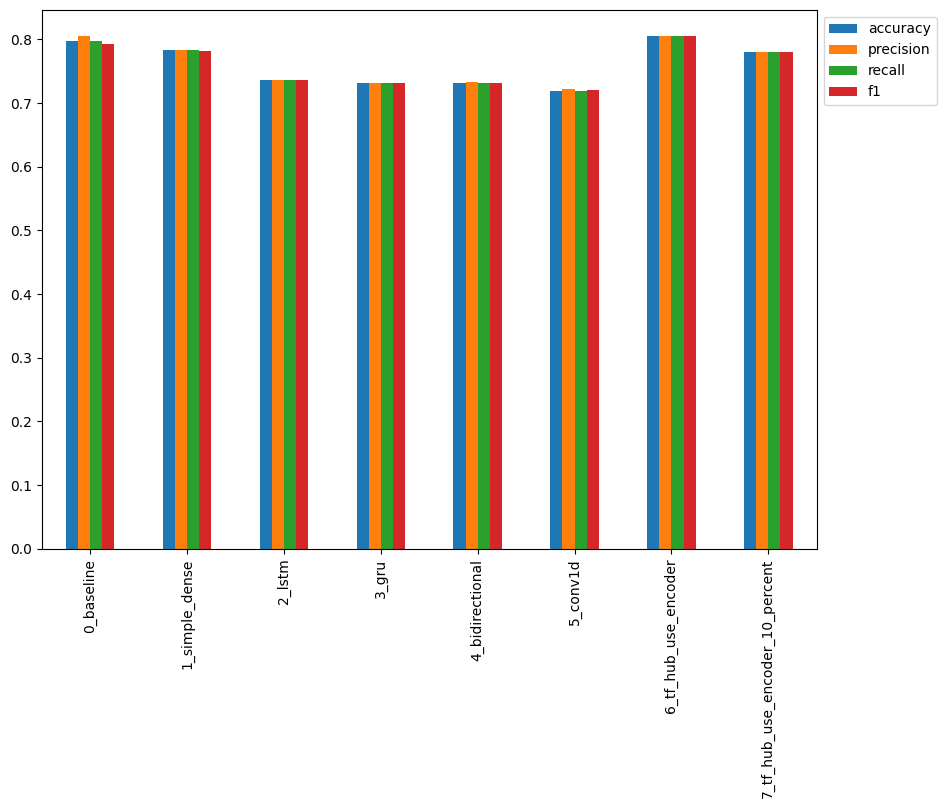

In [ ]:
# Plot and compare all of the model results
all_model_results.plot(kind="bar", figsize=(10,7)).legend(bbox_to_anchor=(1.0, 1.0));

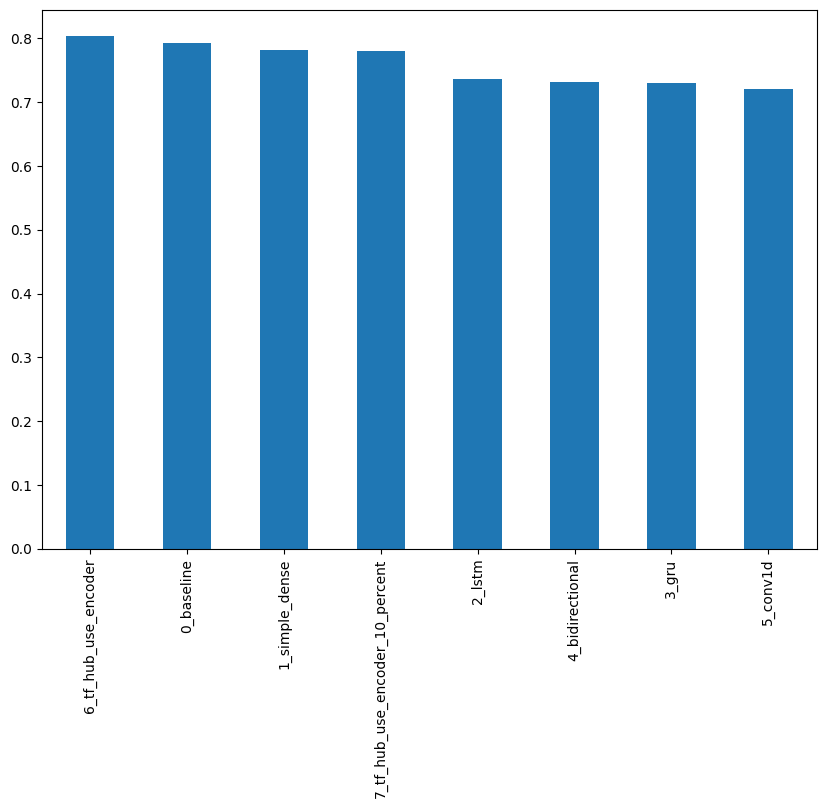

In [ ]:
# Sort model results by F1-scores
all_model_results.sort_values("f1", ascending=False)["f1"].plot(kind="bar", figsize=(10,7));

## Saving and loading our trained models

There are two main formats to save a model in TensorFlow:

1. The `SavedModel` format (this is default when using tensorflow)
2. The `HDF5` format

In [ ]:
# Save TF Hub Sentence encoder model to HDF5 format
model_6.save("model_6.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Load model with our custom Hub Layer (required HDF5 format)
import tensorflow_hub as hub
model_6_loaded = tf.keras.models.load_model("model_6.h5",
                                             custom_objects={"KerasLayer": hub.KerasLayer})

In [ ]:
# How does our loaded model perform ?
model_6_loaded.evaluate(val_sentences, val_labels)

24/24 [==============================] - 1s 20ms/step - loss: 0.4296 - accuracy: 0.8058


[0.42957767844200134, 0.8057742714881897]

In [ ]:
model_6_results

{'accuracy': 80.5774278215223,
 'precision': 0.8057420069627774,
 'recall': 0.8057742782152231,
 'f1': 0.8044743227851235}

Now let's save to the `SavedModel` format...

In [ ]:
# Save TF Hub Sentence Encoder model to SavedModel format
model_6.save("model_6_saved_model")

In [ ]:
# Load in a model from the SavedModel format
model_6_saved_model = tf.keras.models.load_model("model_6_saved_model")

In [ ]:
# Evaluate model in SavedModel format
model_6_saved_model.evaluate(val_sentences, val_labels)

24/24 [==============================] - 1s 10ms/step - loss: 0.4296 - accuracy: 0.8058


[0.42957767844200134, 0.8057742714881897]

## Find the most wrong examples

* If our best model still isn't perfect, what examples is it getting wrong ?
* And of these wrong examples which ones is it getting *most* wrong (those with prediction probabilities closest to the opposite class)

For example if a sample should have a label of 0 but our model predicts a prediction probability of 0.999 (really close to 1) and vice versa.

In [ ]:
# Download a pretrained model from Google Storage
!wget https://storage.googleapis.com/ztm_tf_course/08_model_6_USE_feature_extractor.zip
!unzip 08_model_6_USE_feature_extractor.zip

--2024-08-26 16:06:31--  https://storage.googleapis.com/ztm_tf_course/08_model_6_USE_feature_extractor.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.207, 142.250.141.207, 74.125.137.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 960779165 (916M) [application/zip]
Saving to: ‘08_model_6_USE_feature_extractor.zip’

08_model_6_USE_feat 100%[===================>] 916.27M  50.7MB/s    in 21s     

2024-08-26 16:06:52 (43.1 MB/s) - ‘08_model_6_USE_feature_extractor.zip’ saved [960779165/960779165]

Archive:  08_model_6_USE_feature_extractor.zip
   creating: 08_model_6_USE_feature_extractor/
   creating: 08_model_6_USE_feature_extractor/assets/
   creating: 08_model_6_USE_feature_extractor/variables/
  inflating: 08_model_6_USE_feature_extractor/variables/variables.data-00000-of-00001  
  inflating: 08_model_6_USE_feature_extractor/variables/variables.in

In [ ]:
# Import previously trained model from Google Storage
model_6_pretrained = tf.keras.models.load_model("08_model_6_USE_feature_extractor")
model_6_pretrained.evaluate(val_sentences, val_labels)

24/24 [==============================] - 1s 10ms/step - loss: 0.3872 - accuracy: 0.8241


[0.38718459010124207, 0.8241469860076904]

In [ ]:
# Make predictions with the loaded model from Google Storage
model_6_pretrained_pred_probs = model_6_pretrained.predict(val_sentences)
model_6_pretrained_preds = tf.squeeze(tf.round(model_6_pretrained_pred_probs))
model_6_pretrained_preds[:10] # these should be in label format

24/24 [==============================] - 1s 10ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 0., 0., 0., 1., 1., 0., 0., 1.], dtype=float32)>

In [ ]:
# Create a DataFrame with validation sentences, validation labels and best performing model prediction labels + probabilities
val_df = pd.DataFrame({"text": val_sentences,
                       "target": val_labels,
                       "pred": model_6_pretrained_preds,
                       "pred_prob": tf.squeeze(model_6_pretrained_pred_probs)})
val_df.head()

,text,target,pred,pred_prob
0,#IDFire Cherokee Road and Road 22 (Three Siste...,1,1.0,0.844321
1,Beautiful lightning as seen from plane window ...,0,1.0,0.851977
2,Why did God order obliteration of ancient Cana...,0,0.0,0.114461
3,@Caitsroberts see U the night wee bArra to get...,0,0.0,0.063718
4,Pandemonium In Aba As Woman Delivers Baby With...,1,0.0,0.247876


In [ ]:
# Find the wrong predictions and sort by prediction probabilities
most_wrong = val_df[val_df["target"] != val_df["pred"]].sort_values("pred_prob", ascending=False)
most_wrong[:10] # these are false positives

,text,target,pred,pred_prob
287,@TwopTwips make natural disaster reporting mor...,0,1.0,0.889624
373,@CNN the End of Times are upon us. Famine War ...,0,1.0,0.881311
697,FedEx will no longer transport bioterror patho...,0,1.0,0.876982
548,Have you ever seen the President \nwho killed ...,0,1.0,0.874265
94,San Jose Mercury: Governor Brown allows parole...,0,1.0,0.873231
239,Tales of the #trees #deep water loving #Lake T...,0,1.0,0.869776
448,@noah_anyname That's where the concentration c...,0,1.0,0.852300
1,Beautiful lightning as seen from plane window ...,0,1.0,0.851977
100,Family mourns drowning of 'superhero' toddler ...,0,1.0,0.837567
736,Governor allows parole for California school b...,0,1.0,0.817544


In [ ]:
most_wrong.tail() # these are false negeatives

,text,target,pred,pred_prob
620,Ain't no hoe in my blood,1,0.0,0.076207
616,you can stab me in the back but I promise you'...,1,0.0,0.055746
673,@leedsrouge Love what you picked! We're playin...,1,0.0,0.053190
216,Reddit Will Now QuarantineÛ_ http://t.co/pkUA...,1,0.0,0.038949
714,Oh the usual. Mass murder and world domination...,1,0.0,0.036498


In [ ]:
# Check the false positives  (model predicted 1, when should've been 0)
for row in most_wrong[:10].itertuples():
  _, text, target, pred, pred_prob = row
  print(f"Target: {target}, Pred: {int(pred)}, Prob: {pred_prob}")
  print(f"Text:\n{text}\n")
  print("----\n")

Target: 0, Pred: 1, Prob: 0.8896238803863525
Text:
@TwopTwips make natural disaster reporting more interesting by adding 'The' to headlines such as 'Rescuers are sifting through the wreckage'

----

Target: 0, Pred: 1, Prob: 0.8813107013702393
Text:
@CNN the End of Times are upon us. Famine War Death Plague. The presence is growing stronger.

----

Target: 0, Pred: 1, Prob: 0.8769821524620056
Text:
FedEx will no longer transport bioterror pathogens in wake of anthrax lab mishaps http://t.co/lHpgxc4b8J

----

Target: 0, Pred: 1, Prob: 0.8742649555206299
Text:
Have you ever seen the President 
who killed your wounded child?
Or the man that crashed your sister's plane 
claimin' he was sent of God?

----

Target: 0, Pred: 1, Prob: 0.8732313513755798
Text:
San Jose Mercury: Governor Brown allows parole for California school bus hijacker  http://t.co/GpCeCp9kHv

----

Target: 0, Pred: 1, Prob: 0.8697755932807922
Text:
Tales of the #trees #deep water loving #Lake Tahoe. And no #forest fires h

In [ ]:
# Check the false negeatives (model predicted 0, when should've been 1)
for row in most_wrong[-10:].itertuples():
  _, text, target, pred, pred_prob = row
  print(f"Target: {target}, Pred: {int(pred)}, Prob: {pred_prob}")
  print(f"Text:\n{text}\n")
  print("----\n")

Target: 1, Pred: 0, Prob: 0.09849575906991959
Text:
TodayÛªs storm will pass; let tomorrowÛªs light greet you with a kiss. Bask in this loving warmth; let your soul return to bliss.

----

Target: 1, Pred: 0, Prob: 0.09772361814975739
Text:
Jack Wilshere has poor injury recordand his off field behaviors doesn't help.#Arsenal

----

Target: 1, Pred: 0, Prob: 0.09160558879375458
Text:
Flattened thee striker

----

Target: 1, Pred: 0, Prob: 0.08508124947547913
Text:
I went to pick up my lunch today and the bartender was holding my change hostage because he wanted my number. ??

----

Target: 1, Pred: 0, Prob: 0.08042652159929276
Text:
VICTORINOX SWISS ARMY DATE WOMEN'S RUBBER MOP WATCH 241487 http://t.co/yFy3nkkcoH http://t.co/KNEhVvOHVK

----

Target: 1, Pred: 0, Prob: 0.0762074887752533
Text:
Ain't no hoe in my blood

----

Target: 1, Pred: 0, Prob: 0.05574583262205124
Text:
you can stab me in the back but I promise you'll be the one bleeding

----

Target: 1, Pred: 0, Prob: 0.0531901

## Making predictions on the test dataset

In [ ]:
# Making predictions on the test dataset and visualizing them
test_sentences = test_df["text"].to_list()
test_samples = random.sample(test_sentences,10)
for test_sample in test_samples:
  pred_prob = tf.squeeze(model_6_pretrained.predict([test_sample])) # our model expects a list as input
  pred = tf.round(pred_prob)
  print(f"Pred: {int(pred)}, Prob: {pred_prob}")
  print(f"Text:\n{test_sample}\n")
  print("----\n")

1/1 [==============================] - 0s 52ms/step
Pred: 0, Prob: 0.24930278956890106
Text:
Remove the http://t.co/Ytao0lT144 and Linkury Browser Hijacker http://t.co/uxEKjeuIVp http://t.co/abvvRLFgDh

----

1/1 [==============================] - 0s 45ms/step
Pred: 1, Prob: 0.8500266671180725
Text:
Go home California you're drunk. Natural selection has taken affect. Debt extreme wild fires water supply problems. You fail as a state.

----

1/1 [==============================] - 0s 34ms/step
Pred: 1, Prob: 0.6729339957237244
Text:
Be safe and be prepare from emergency kits to evacuation. Alertness esp women and children who are also @gmanews  https://t.co/3GALBowItN

----

1/1 [==============================] - 0s 36ms/step
Pred: 0, Prob: 0.36386638879776
Text:
omfg Johnny tsunami commercial

----

1/1 [==============================] - 0s 35ms/step
Pred: 0, Prob: 0.07542961090803146
Text:
@AllOutAsh23_sN Heard you got obliterated and also that your brother/boyfriend ran out of the bui

## The speed/score tradeoff

In [ ]:
# Let's make a function to measure the time of prediction
import time
def pred_timer(model, samples):
  """
  Times how long a model takes to make predictions on samples.
  """
  start_time = time.perf_counter() # get start time
  model.predict(samples) # make predictions
  end_time = time.perf_counter() # get end time
  total_time = end_time - start_time # calculate how long predictions took to make
  time_per_pred = total_time/len(samples)
  return total_time, time_per_pred

In [ ]:
# Calculate TF Hub Sentence Encoder time per pred
model_6_total_pred_time, model_6_time_per_pred = pred_timer(model_6_pretrained, val_sentences)
print(f"Total time: {model_6_total_pred_time} seconds")
print(f"Time per pred: {model_6_time_per_pred} seconds")

24/24 [==============================] - 0s 16ms/step
Total time: 0.5367101049999974 seconds
Time per pred: 0.0007043439698162696 seconds


In [ ]:
# Calculate our baseline model time per pred
baseline_total_pred_time, baseline_time_per_pred = pred_timer(model_0, val_sentences)
print(f"Total time: {baseline_total_pred_time} seconds")
print(f"Time per pred: {baseline_time_per_pred} seconds")

Total time: 0.02959908599996197 seconds
Time per pred: 3.884394488183986e-05 seconds


In [ ]:
model_6_pretrained_results = calculate_results(y_true=val_labels,
                                    y_pred=model_6_pretrained_preds)
model_6_pretrained_results

{'accuracy': 82.41469816272966,
 'precision': 0.8247806401490567,
 'recall': 0.8241469816272966,
 'f1': 0.8227682169021602}

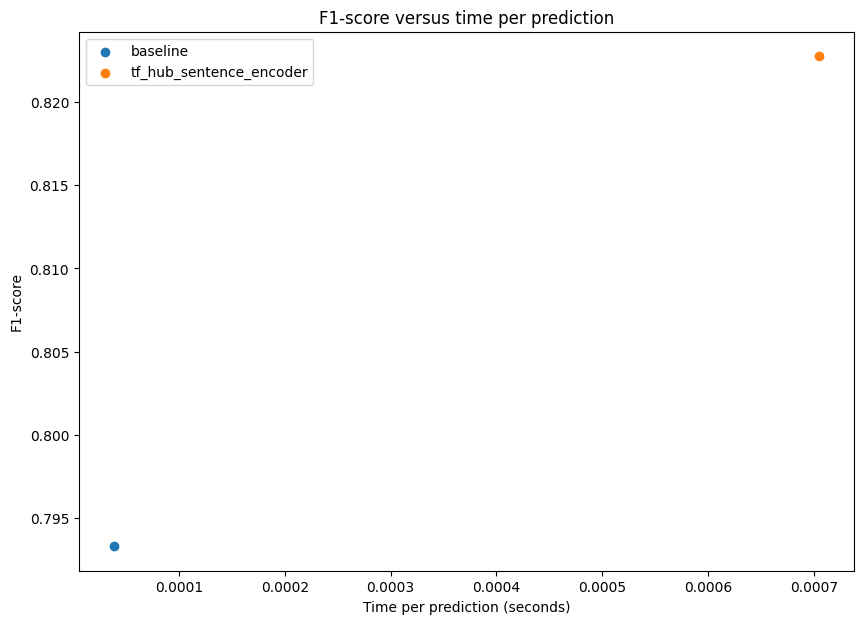

In [ ]:
# Model's time per prediction vs F1 score for our baseline as well as our model 6 pretrained model

import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
plt.scatter(baseline_time_per_pred, baseline_results["f1"], label="baseline")
plt.scatter(model_6_time_per_pred, model_6_pretrained_results["f1"], label="tf_hub_sentence_encoder")
plt.legend()
plt.title("F1-score versus time per prediction")
plt.xlabel("Time per prediction (seconds)")
plt.ylabel("F1-score");

## **TensorFlow Exercises** for Practice

In [ ]:
# Building a model with the Sequential API
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

model_11 = Sequential([
  layers.Input(shape=(1,), dtype=tf.string),
  text_vectorizer,
  embedding,
  layers.GlobalAveragePooling1D(),
  layers.Dense(1, activation="sigmoid")
], name="model_11_sequential")

In [ ]:
# Compile and fit the model
model_11.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_11.fit(train_sentences, train_labels, epochs=5, validation_data=(val_sentences, val_labels))

Epoch 1/5
215/215 [==============================] - 8s 32ms/step - loss: 0.4962 - accuracy: 0.8489 - val_loss: 0.4937 - val_accuracy: 0.7822
Epoch 2/5
215/215 [==============================] - 2s 7ms/step - loss: 0.2881 - accuracy: 0.9244 - val_loss: 0.4703 - val_accuracy: 0.7822
Epoch 3/5
215/215 [==============================] - 2s 8ms/step - loss: 0.2090 - accuracy: 0.9412 - val_loss: 0.4879 - val_accuracy: 0.7795
Epoch 4/5
215/215 [==============================] - 2s 9ms/step - loss: 0.1661 - accuracy: 0.9555 - val_loss: 0.5163 - val_accuracy: 0.7598
Epoch 5/5
215/215 [==============================] - 1s 7ms/step - loss: 0.1380 - accuracy: 0.9620 - val_loss: 0.5487 - val_accuracy: 0.7559


In [ ]:
# Building another model with the Sequential API
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

model_21 = Sequential([
  layers.Input(shape=(1,), dtype=tf.string),
  text_vectorizer,
  embedding,
  layers.LSTM(64),
  layers.Dense(1, activation="sigmoid")
], name="model_21_sequential")

In [ ]:
# Compile and fit the model
model_21.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_21.fit(train_sentences, train_labels, epochs=5, validation_data=(val_sentences, val_labels))

Epoch 1/5
215/215 [==============================] - 15s 58ms/step - loss: 0.1144 - accuracy: 0.9654 - val_loss: 1.0839 - val_accuracy: 0.7415
Epoch 2/5
215/215 [==============================] - 6s 29ms/step - loss: 0.0503 - accuracy: 0.9790 - val_loss: 1.4567 - val_accuracy: 0.7178
Epoch 3/5
215/215 [==============================] - 7s 33ms/step - loss: 0.0460 - accuracy: 0.9800 - val_loss: 1.3286 - val_accuracy: 0.7375
Epoch 4/5
215/215 [==============================] - 5s 24ms/step - loss: 0.0404 - accuracy: 0.9822 - val_loss: 1.5000 - val_accuracy: 0.7113
Epoch 5/5
215/215 [==============================] - 7s 33ms/step - loss: 0.0412 - accuracy: 0.9813 - val_loss: 1.6233 - val_accuracy: 0.7231


In [ ]:
# Building another model with the Sequential API
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

model_31 = Sequential([
  layers.Input(shape=(1,), dtype=tf.string),
  text_vectorizer,
  embedding,
  layers.Conv1D(filters=64, kernel_size=5, strides=1, activation="relu", padding="valid"),
  layers.GlobalMaxPool1D(),
  layers.Dense(1, activation="sigmoid")
], name="model_31_sequential")

In [ ]:
# Compile and fit the model
model_31.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_31.fit(train_sentences, train_labels, epochs=5, validation_data=(val_sentences, val_labels))

Epoch 1/5
215/215 [==============================] - 9s 35ms/step - loss: 0.1002 - accuracy: 0.9666 - val_loss: 0.9979 - val_accuracy: 0.7349
Epoch 2/5
215/215 [==============================] - 2s 11ms/step - loss: 0.0638 - accuracy: 0.9764 - val_loss: 1.2199 - val_accuracy: 0.7257
Epoch 3/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0521 - accuracy: 0.9790 - val_loss: 1.2999 - val_accuracy: 0.7205
Epoch 4/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0494 - accuracy: 0.9796 - val_loss: 1.3332 - val_accuracy: 0.7257
Epoch 5/5
215/215 [==============================] - 1s 7ms/step - loss: 0.0446 - accuracy: 0.9813 - val_loss: 1.4511 - val_accuracy: 0.7244


In [ ]:
# Training baseline with 10% of the training data
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Create Tokenization and modelling pipeline
model_41 = Pipeline([
    ("tfidf", TfidfVectorizer()), # convert words to numbers using tfidf
    ("clf", MultinomialNB()) # model the text
])

# Fit the pipeline to the training data
model_41.fit(train_sentences_10_percent, train_labels_10_percent)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [ ]:
new_baseline_score = model_41.score(val_sentences,val_labels)
print(f"Our baseline model achieves an accuracy of: {new_baseline_score*100:.2f}%")

Our baseline model achieves an accuracy of: 73.75%


In [ ]:
# Creating a trainable sentence encoder layer
sentence_encoder_layer_with_training = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[], # shape of inputs coming to our model,
                                        dtype=tf.string, # data type of inputs
                                        trainable=True, # keep the pretrained weights (we'll create a feature extractor)
                                        name="USE")

In [ ]:
# Create a model using the Sequential API
model_51 = tf.keras.Sequential([
  sentence_encoder_layer_with_training, # take in sentences and then encode them into an embedding
  layers.Dense(64, activation="relu"),
  layers.Dense(1, activation="sigmoid")],
  name="model_51_USE")

# Compile the model
model_51.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
# Fit the model
model_51_history = model_51.fit(train_sentences,
                                train_labels,
                                epochs=5,
                                validation_data=(val_sentences,val_labels))

Epoch 1/5
215/215 [==============================] - 32s 148ms/step - loss: 0.3245 - accuracy: 0.8682 - val_loss: 0.4262 - val_accuracy: 0.8136
Epoch 2/5
215/215 [==============================] - 26s 123ms/step - loss: 0.1141 - accuracy: 0.9628 - val_loss: 0.7102 - val_accuracy: 0.7546
Epoch 3/5
215/215 [==============================] - 25s 117ms/step - loss: 0.0534 - accuracy: 0.9823 - val_loss: 0.6209 - val_accuracy: 0.7940
Epoch 4/5
215/215 [==============================] - 22s 103ms/step - loss: 0.0349 - accuracy: 0.9876 - val_loss: 0.6530 - val_accuracy: 0.8058
Epoch 5/5
215/215 [==============================] - 23s 105ms/step - loss: 0.0264 - accuracy: 0.9901 - val_loss: 0.7139 - val_accuracy: 0.7913


In [ ]:
# Make some predictions with our Conv1D model
model_51_pred_probs = model_51.predict(val_sentences)
# Convert model 51 pred probs to labels
model_51_preds = tf.squeeze(tf.round(model_51_pred_probs))
# Evaluate model 51 predictions
model_51_results = calculate_results(y_true=val_labels,
                                    y_pred=model_51_preds)
model_51_results

24/24 [==============================] - 1s 9ms/step


{'accuracy': 79.13385826771653,
 'precision': 0.790794448403056,
 'recall': 0.7913385826771654,
 'f1': 0.7903304212685924}

In [ ]:
# Combine model results into a dataframe
all_model_results = pd.DataFrame({"0_baseline": baseline_results,
                                 "1_simple_dense": model_1_results,
                                 "2_lstm": model_2_results,
                                 "3_gru": model_3_results,
                                 "4_bidirectional": model_4_results,
                                 "5_conv1d": model_5_results,
                                 "6_tf_hub_use_encoder": model_6_results,
                                 "7_tf_hub_use_encoder_10_percent": model_7_results,
                                 "model_51_USE": model_51_results})
all_model_results = all_model_results.transpose()
all_model_results

,accuracy,precision,recall,f1
0_baseline,79.790026,0.804912,0.797900,0.793292
1_simple_dense,78.346457,0.783490,0.783465,0.781572
2_lstm,73.622047,0.735678,0.736220,0.735887
3_gru,73.097113,0.730882,0.730971,0.730925
4_bidirectional,73.097113,0.733554,0.730971,0.731708
5_conv1d,71.916010,0.722271,0.719160,0.720003
6_tf_hub_use_encoder,80.577428,0.805742,0.805774,0.804474
7_tf_hub_use_encoder_10_percent,77.952756,0.779854,0.779528,0.779669
model_51_USE,79.133858,0.790794,0.791339,0.790330


In [ ]:
# Reduce the accuracy to the same scale as the other metrics
all_model_results["accuracy"] = all_model_results["accuracy"]/100
all_model_results

,accuracy,precision,recall,f1
0_baseline,0.797900,0.804912,0.797900,0.793292
1_simple_dense,0.783465,0.783490,0.783465,0.781572
2_lstm,0.736220,0.735678,0.736220,0.735887
3_gru,0.730971,0.730882,0.730971,0.730925
4_bidirectional,0.730971,0.733554,0.730971,0.731708
5_conv1d,0.719160,0.722271,0.719160,0.720003
6_tf_hub_use_encoder,0.805774,0.805742,0.805774,0.804474
7_tf_hub_use_encoder_10_percent,0.779528,0.779854,0.779528,0.779669
model_51_USE,0.791339,0.790794,0.791339,0.790330


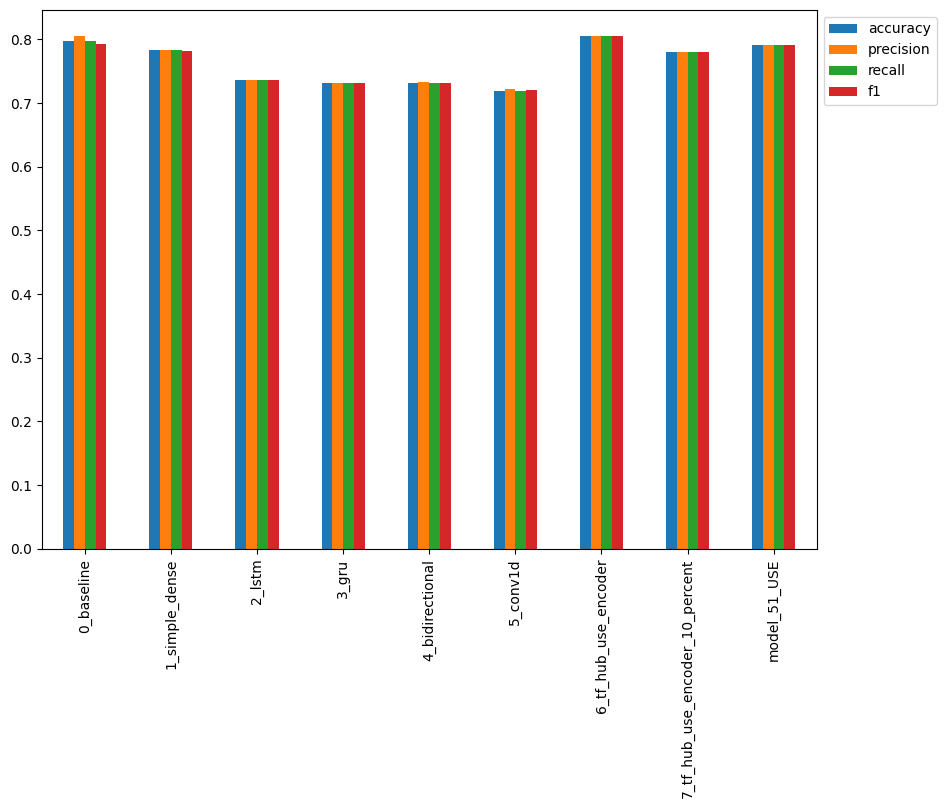

In [ ]:
# Plotting the results to comapre
all_model_results.plot(kind="bar", figsize=(10,7)).legend(bbox_to_anchor=(1.0, 1.0));

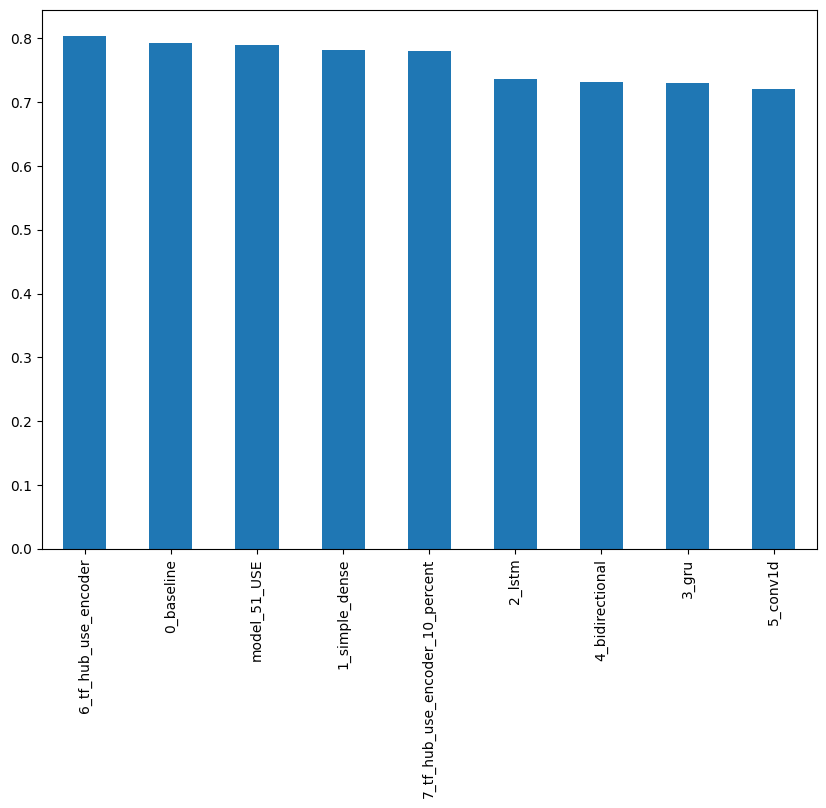

In [ ]:
# Sort model results by F1-scores
all_model_results.sort_values("f1", ascending=False)["f1"].plot(kind="bar", figsize=(10,7));

In [ ]:
train_sentences, train_labels = (train_df_shuffled["text"].to_numpy(),
                                 train_df_shuffled["target"].to_numpy())

In [ ]:
len(train_sentences), len(train_labels)

(7613, 7613)

In [ ]:
test_sentences = (test_df["text"].to_numpy())
len(test_sentences)

3263

In [ ]:
# Training on the model with best yet results
model_6_new_history = model_6.fit(train_sentences,
                                  train_labels,
                                  epochs=5,
                                  validation_data=(val_sentences, val_labels))

Epoch 1/5
238/238 [==============================] - 4s 16ms/step - loss: 0.3398 - accuracy: 0.8524 - val_loss: 0.3499 - val_accuracy: 0.8465
Epoch 2/5
238/238 [==============================] - 3s 12ms/step - loss: 0.3324 - accuracy: 0.8564 - val_loss: 0.3398 - val_accuracy: 0.8491
Epoch 3/5
238/238 [==============================] - 3s 12ms/step - loss: 0.3257 - accuracy: 0.8600 - val_loss: 0.3305 - val_accuracy: 0.8543
Epoch 4/5
238/238 [==============================] - 3s 12ms/step - loss: 0.3184 - accuracy: 0.8659 - val_loss: 0.3238 - val_accuracy: 0.8648
Epoch 5/5
238/238 [==============================] - 4s 15ms/step - loss: 0.3101 - accuracy: 0.8689 - val_loss: 0.3143 - val_accuracy: 0.8635


In [ ]:
# Make some predictions with our best yet model
model_6_new_pred_probs = model_6.predict(val_sentences)
# Convert model 51 pred probs to labels
model_6_new_preds = tf.squeeze(tf.round(model_6_new_pred_probs))
# Evaluate model 51 predictions
model_6_new_results = calculate_results(y_true=val_labels,
                                        y_pred=model_6_new_preds)
model_6_new_results

24/24 [==============================] - 0s 9ms/step


{'accuracy': 86.3517060367454,
 'precision': 0.8655202814561257,
 'recall': 0.863517060367454,
 'f1': 0.8622819689338196}

In [ ]:
# Making some predictions on our test data
model_6_new_pred_probs_test = model_6.predict(test_sentences)
# Convert model 6 pred probs to labels
model_6_new_preds_test = tf.squeeze(tf.round(model_6_new_pred_probs_test))
model_6_new_preds_test[:20]

102/102 [==============================] - 1s 9ms/step


<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0.], dtype=float32)>

In [ ]:
from helper_functions import make_confusion_matrix

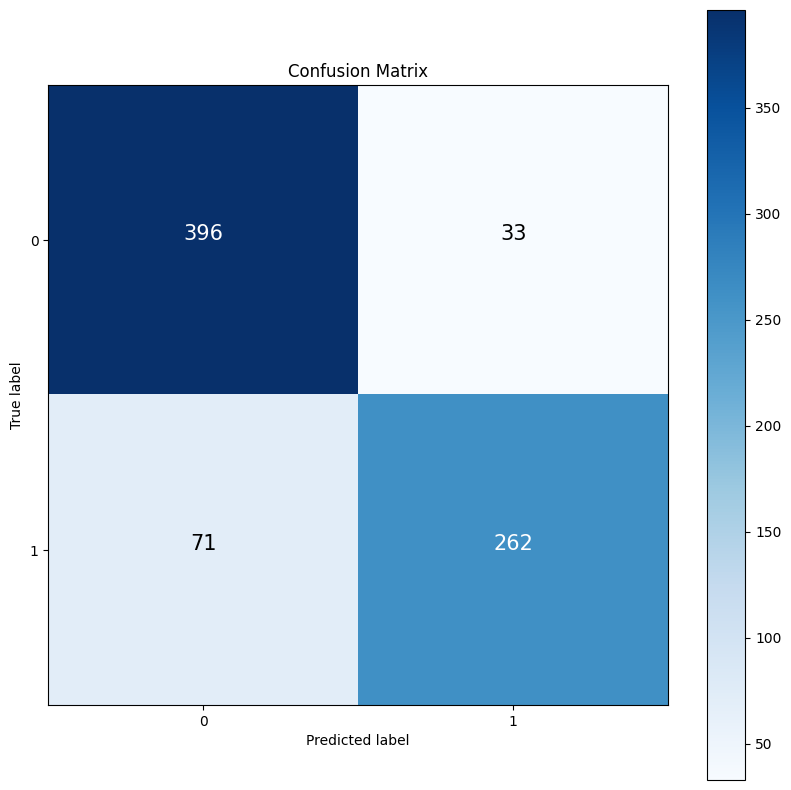

In [ ]:
# Create a confusion matrix with the best yet performing model's predictions
make_confusion_matrix(y_true=val_labels,
                      y_pred=model_6_new_preds,
                      figsize=(10,10))